In [0]:
import pandas as pd
import numpy as np

In [0]:
!pip install babelpy
from babelpy import babelfy

  Created wheel for babelpy: filename=BabelPy-1.0.1-cp36-none-any.whl size=9723 sha256=963059526d9bca859cd8d8c4a69c1e7f8bbd04980dc700903040c9ed64ecd6ce
  Stored in directory: /root/.cache/pip/wheels/c9/53/db/2b25b9bdc97574bd1a076b31d0a8ba8f8ce0969e247debcc5b
Successfully built babelpy


In [73]:
import nltk
import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['coronavirus', 'Koronavirus', 'trump', 'covid-19', 'corona', 'covid', 
                  'covid19', 'covd', 'virus', 'pandemic', 'chinese', 'china', 'wuhan', 'ncov', 'Kungflu',
                  'chinavirus', 'fuck', 'fuckers', 'covidiot'])


def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopwords:
            result.append(token)

    combined_result = ' '.join(result) 
    return combined_result

def preprocess_v2(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopwords:
            result.append(token)
            
    return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df = pd.read_pickle("dfnmf500k.pkl")
df1000 = df.sample(1000)

In [0]:
df1000['tweet'] = df1000['tweet'].apply(lambda x: preprocess(x))

In [0]:
df994 = df1000.sample(994)

In [0]:
text = df1000['tweet'].tolist()[999]
text

'working closely others outbreak people good recovery'

In [0]:
#from babelfy import BabelfyClient


# Instantiate BabelFy client

API_KEY  = 'ddacf5fe-702e-4b24-b6b8-95a4806d8acc'

params = dict()
params['lang'] = 'EN'
params['cands'] = 'TOP'
babel_client = babelfy.BabelfyClient(API_KEY, params)

In [0]:
babel_client.babelfy(text)
entitiesDictList = babel_client.entities

In [0]:
entitiesDictList

[{'BabelNetURL': 'http://babelnet.org/rdf/s00095812v',
  'DBpediaURL': '',
  'babelSynsetID': 'bn:00095812v',
  'charFragment': {'end': 6, 'start': 0},
  'coherenceScore': 0.0,
  'end': 6,
  'globalScore': 0.0,
  'isEntity': True,
  'score': 0.0,
  'source': 'MCS',
  'start': 0,
  'text': 'working',
  'tokenFragment': {'end': 0, 'start': 0}},
 {'BabelNetURL': 'http://babelnet.org/rdf/s00114751r',
  'DBpediaURL': '',
  'babelSynsetID': 'bn:00114751r',
  'charFragment': {'end': 14, 'start': 8},
  'coherenceScore': 0.5,
  'end': 14,
  'globalScore': 0.16666666666666666,
  'isEntity': True,
  'score': 1.0,
  'source': 'BABELFY',
  'start': 8,
  'text': 'closely',
  'tokenFragment': {'end': 1, 'start': 1}},
 {'BabelNetURL': 'http://babelnet.org/rdf/s00031495n',
  'DBpediaURL': 'http://dbpedia.org/resource/Outbreak',
  'babelSynsetID': 'bn:00031495n',
  'charFragment': {'end': 30, 'start': 23},
  'coherenceScore': 0.0,
  'end': 30,
  'globalScore': 0.0,
  'isEntity': True,
  'score': 0.0,
  

In [0]:
def babelfyTweet(x):

  
  # Babelfy sentence
  babel_client.babelfy(x)

  # Get entity data
  #print(babel_client.entities)
  try:
    #entitiesFlag = True
    #print('here')
    entitiesDictList = babel_client.entities
    #print(babel_client.entities)
  except AttributeError:
    ("AttributeError for review: "+x)
    return(x)

  entitiesToAdd = []

  for entDict in entitiesDictList:
    entitiesToAdd.append(entDict['text'])


  return(entitiesToAdd)

In [0]:
df['Entities'] = df994.tweet.apply(babelfyTweet)

In [0]:
df994_labeled = pd.merge(df994, df['Entities'], left_index=True, right_index=True)

In [0]:
df994_labeled.to_pickle("df994_labeled.pkl")

In [0]:
df994_labeled = pd.read_pickle("df994_labeled.pkl")

In [0]:
allEntities = []

for EList in df994_labeled.Entities.tolist():
  allEntities.extend(EList)


In [6]:
print(len(allEntities))
words_dist = nltk.FreqDist(allEntities)

7965


In [0]:
top_N = 50

rslt = pd.DataFrame(words_dist.most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')

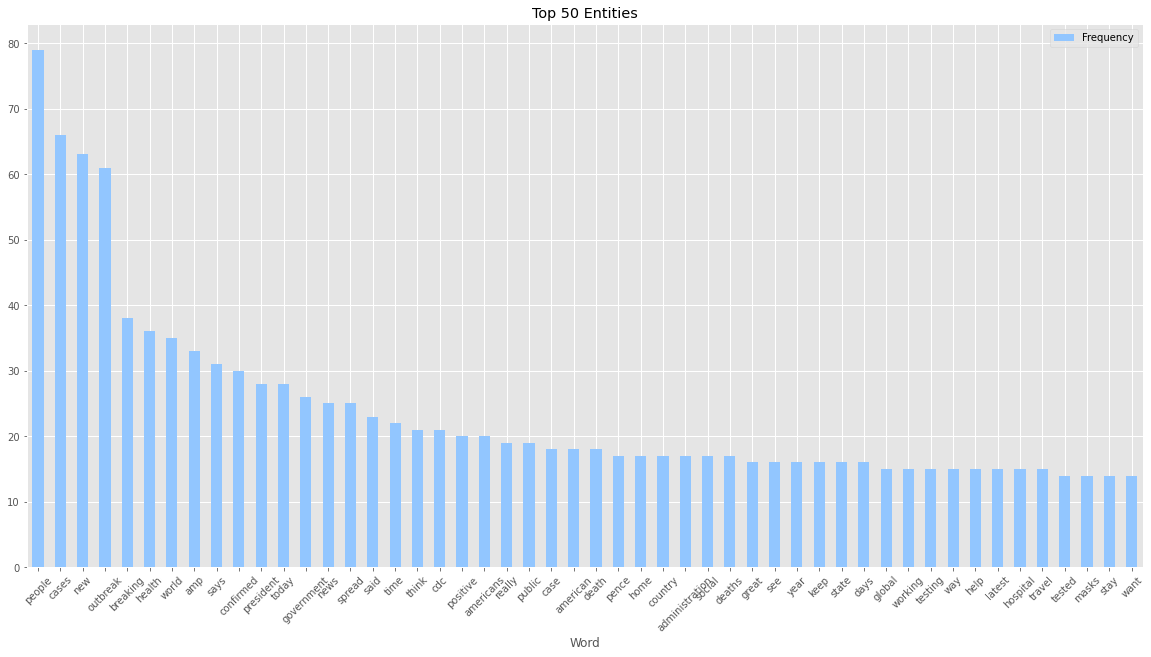

In [100]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-pastel')

rslt.plot.bar(rot=45, figsize = (20,10), title = 'Top 50 Entities')

In [16]:
words_dist['deaths']

17

In [11]:
rslt

,Frequency
Word,
people,79
cases,66
new,63
outbreak,61
breaking,38
health,36
world,35
amp,33
says,31


Looking into grouping labels with SPACY library similarity functions

In [104]:
!python3 -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
import spacy 
import en_core_web_lg
  
nlp = en_core_web_lg.load()

In [118]:
print("Similarity:", nlp('great').similarity(nlp('death')))

Similarity: 0.30975515438896345


In [0]:
def filterEntities(entList):

  topics = ['cases', 'outbreak', 'symptoms', 'positive', 'mask', 'masks', 'case', 'new', 'spread',
            'tested', 'social', 'testing', 'confirmed', 'quarantine', 'cruise', 'hospital', 'emergency',
            'distancing', 'death', 'deaths']

  filteredList = []
  for entity in entList:
    if entity in topics:
      filteredList.append(entity) 


  if len(filteredList) == 0:
    return np.nan
  else:
    return filteredList



In [0]:
df994_labeled['Entities'] = df994_labeled['Entities'].apply(lambda x: filterEntities(x))

In [0]:
df994_labeled = df994_labeled.dropna()

In [34]:
df994_labeled

,tweet,Entities
102721,imagine cruise ship middle sea board waiting f...,[cruise]
438979,govt fix riodejaneiro gangs new lockdown story,[new]
474228,new conservative defense everybody late see true,[new]
35013,announced monday confirmed cases pneumonia cau...,"[confirmed, cases]"
334434,new nurse sars outbreak talks learn,"[new, outbreak]"
...,...,...
136544,confirmed cases february latest data national ...,"[confirmed, cases]"
112022,three cases identified france health ministry ...,"[cases, cases]"
204868,donation response recent outbreak baidu jungko...,[outbreak]
355574,landed jfk reporting milan lombardy epicenter ...,[outbreak]


Testing some supervised LDA/classifiers

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.externals import joblib

X_train, X_test, y_train, y_test = train_test_split(df994_labeled['tweet'], df994_labeled['Entities'], test_size=0.10, random_state=42)

vectorizer = CountVectorizer(analyzer='word')
X_train = vectorizer.fit_transform(X_train.tolist())
X_test = vectorizer.transform(X_test.tolist())

In [0]:
lda = LatentDirichletAllocation(n_components=20, random_state=22, learning_method='online')
X_train_tps = lda.fit_transform(X_train)
X_test_tps = lda.transform(X_test)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
labeler = MultiLabelBinarizer()
labels_train = labeler.fit_transform(y_train.tolist())
labels_test = labeler.transform(y_test.tolist())

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
lr = LogisticRegression()
clf = OneVsRestClassifier(SVC())
clf.fit(X_train_tps, labels_train)
y_pred = clf.predict(X_test_tps)


0
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
2
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
3
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
4
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
5
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
6
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
7
the predicted genres: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the actual genres: [0 0 0 0 0 0 0 0 0 0 0 0 1

In [0]:
df500k = pd.read_pickle("dfnmf500k.pkl")
df10000 = df500k.sample(50000)

In [0]:
df10000['tweet'] = df10000['tweet'].apply(lambda x: preprocess_v2(x))

In [0]:
df10000['Entities'] = df10000['tweet'].apply(lambda x: filterEntities(x))

In [0]:
df10000 = df10000.dropna()

df10000['tweet'] = df10000['tweet'].apply(lambda x: ' '.join(x))

In [85]:
df10000

,tweet,Entities
53191,breaking number confirmed cases rises death to...,"[confirmed, cases, death]"
370486,countries ahead us testing universal health care,[testing]
291325,england first two confirmed patients transferr...,[confirmed]
45089,raleigh woman stuck south korea cases spike,[cases]
112115,three official cases africa low rate puzzles h...,[cases]
...,...,...
43082,diamond princess mill got ship removed within ...,[hospital]
476361,week old baby connecticut becomes latest infan...,[death]
70680,sent costco see people stocking even though he...,[case]
33985,jimmy john sandwich item linked new coli outbreak,"[new, outbreak]"


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df10000['tweet'], df10000['Entities'], test_size=0.25, random_state=42)

vectorizer = CountVectorizer(analyzer='word')
X_train = vectorizer.fit_transform(X_train.tolist())
X_test = vectorizer.transform(X_test.tolist())

In [0]:
lda = LatentDirichletAllocation(n_components=20, random_state=22, learning_method='online')
X_train_tps = lda.fit_transform(X_train)
X_test_tps = lda.transform(X_test)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
labeler = MultiLabelBinarizer()
labels_train = labeler.fit_transform(y_train.tolist())
labels_test = labeler.transform(y_test.tolist())

In [90]:
lr = LogisticRegression()
clf = OneVsRestClassifier(SVC())
clf.fit(X_train_tps, labels_train)
y_pred = clf.predict(X_test_tps)


accuracy score: 0.10816267666570523


In [0]:
  topics = ['cases', 'outbreak', 'symptoms', 'positive', 'mask', 'masks', 'case', 'new', 'spread',
            'tested', 'social', 'testing', 'confirmed', 'quarantine', 'cruise', 'hospital', 'emergency',
            'distancing', 'death', 'deaths']

In [0]:

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in topics:
    NB_pipeline.fit(X_train, train[category])
    prediction = NB_pipeline.predict(X_test)
